In [50]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Create dataframes
city = pd.read_csv('./raw_data/city_data.csv')
ride = pd.read_csv('./raw_data/ride_data.csv')
ride_cities = pd.merge(city, ride, on='city')
ride_cities.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [3]:
city_group = ride_cities.groupby(by='city')
funcs = {'driver_count': 'first', 'type': 'first', 'fare': 'mean', 'ride_id': 'count'}
city_data = city_group.agg(funcs)
city_data.rename(columns={'ride_id': 'rides'}, inplace=True)
city_data.head()

,driver_count,type,fare,rides
city,,,,
Alvarezhaven,21,Urban,23.928710,31
Alyssaberg,67,Urban,20.609615,26
Anitamouth,16,Suburban,37.315556,9
Antoniomouth,21,Urban,23.625000,22
Aprilchester,49,Urban,21.981579,19


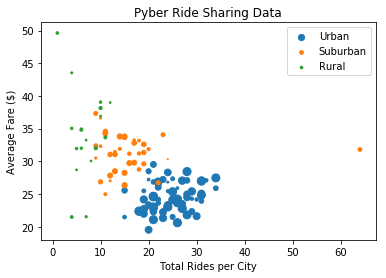

In [49]:
for city_type in ['Urban', 'Suburban', 'Rural']:
    scatter_data = city_data[city_data['type'] == city_type]
    plt.scatter(scatter_data['rides'], scatter_data['fare'], s=scatter_data['driver_count'])

plt.legend(['Urban', 'Suburban', 'Rural'])
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Rides per City')
plt.ylabel('Average Fare ($)')
plt.show()

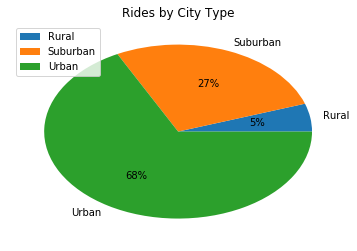

In [34]:
city_sums = city_data[['type', 'driver_count', 'rides']].groupby(by='type').sum()
city_sums.plot(kind='pie', y='rides', autopct='%1.0f%%')
plt.title('Rides by City Type')
plt.ylabel('')
plt.show()

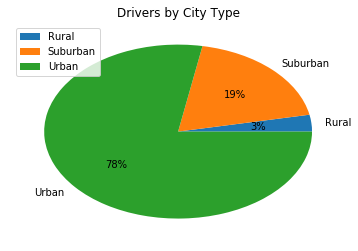

In [35]:
city_sums.plot(kind='pie', y='driver_count', autopct='%1.0f%%')
plt.title('Drivers by City Type')
plt.ylabel('')
plt.show()

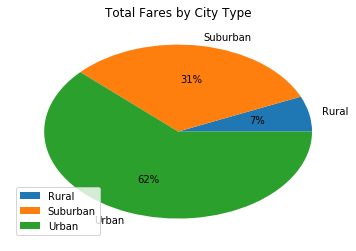

In [37]:
fare_groups = ride_cities[['type', 'fare']].groupby(by='type').sum()
fare_groups.plot(kind='pie', y='fare', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Total Fares by City Type')
plt.show()